# 1 ライブラリとデータ

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0),(1)),lambda x: x.view(-1)])

root = './data'
mnist_train = datasets.MNIST(root=root,download=True,train=True,transform=transform)
mnist_test = datasets.MNIST(root=root,download=True,train=False,transform=transform)

train_dataloader = DataLoader(mnist_train,batch_size=100,shuffle=True)
test_dataloader = DataLoader(mnist_test,batch_size=100,shuffle=False)

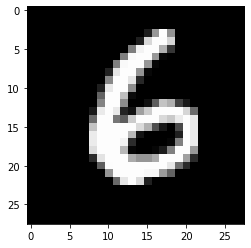

In [3]:
x, t = next(iter(train_dataloader))
image = x[0,].view(28,28).detach().numpy()
plt.imshow(image,cmap='binary_r')

# 2 モデル

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,200)
        self.do = nn.Dropout(0.1)
        self.l2 = nn.Linear(200,10)
    def forward(self,x):
        x = self.l1(x)
        x = torch.relu(x)
        x = self.do(x)
        x = self.l2(x)
        return x

In [5]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,200)
        self.bn = nn.BatchNorm1d(200)
        self.l2 = nn.Linear(200,10)
    def forward(self,x):
        x = self.l1(x)
        x = self.bn(x)
        x = torch.relu(x)
        x = self.l2(x)
        return x

In [6]:
# model = nn.Sequential(nn.Linear(784,200), nn.ReLU(), nn.Dropout(0.1), nn.Linear(200,10))
# model = nn.Sequential(nn.Linear(784,200), nn.BatchNorm1d(200), nn.ReLU(), nn.Linear(200,10))
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=1e-2)

# 3 モデルの学習と評価

In [7]:
loss_train_all = []
acc_train_all = []
loss_test_all = []
acc_test_all = []

for epoch in range(1, 20+1):
    
    loss_train = 0
    acc_train = 0
    loss_test = 0
    acc_test = 0
    
    model.train()
    for (x,t) in train_dataloader:
        y = model(x)
        loss = criterion(y,t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item()
        acc_train += sum(y.argmax(axis=1) == t)/len(t)
        
    loss_train_mean = loss_train / len(train_dataloader)
    acc_train_mean = acc_train / len(train_dataloader)
    
    model.eval()
    with torch.no_grad():
        for x, t in test_dataloader:
            y = model(x)
            loss = criterion(y,t)
        
            loss_test += loss.item()
            acc_test += sum(y.argmax(axis=1) == t)/len(t)
        
    loss_test_mean = loss_test / len(test_dataloader)
    acc_test_mean = acc_test / len(test_dataloader)
    
    loss_train_all.append(loss_train_mean)
    acc_train_all.append(acc_train_mean)
    loss_test_all.append(loss_test_mean)
    acc_test_all.append(acc_test_mean)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f"Epoch: {epoch}")
        print(f"loss_train: {loss_train_mean:.4f}, acc_train: {acc_train_mean:.4f}")
        print(f"loss_test: {loss_test_mean:.4f}, acc_test: {acc_test_mean:.4f}")    

Epoch: 1
loss_train: 0.5940, acc_train: 0.8639
loss_test: 0.3185, acc_test: 0.9213
Epoch: 5
loss_train: 0.1918, acc_train: 0.9493
loss_test: 0.1696, acc_test: 0.9548
Epoch: 10
loss_train: 0.1287, acc_train: 0.9675
loss_test: 0.1250, acc_test: 0.9675
Epoch: 15
loss_train: 0.0979, acc_train: 0.9761
loss_test: 0.1043, acc_test: 0.9712
Epoch: 20
loss_train: 0.0785, acc_train: 0.9819
loss_test: 0.0938, acc_test: 0.9745


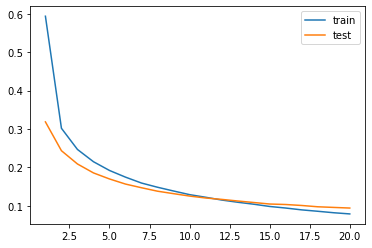

In [8]:
plt.plot(range(1,len(loss_train_all)+1), loss_train_all, label="train")
plt.plot(range(1,len(loss_test_all)+1), loss_test_all, label="test")
plt.legend()

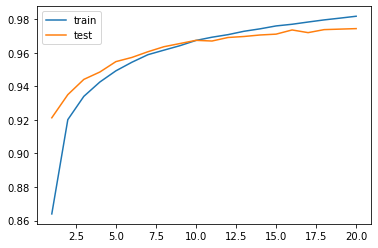

In [9]:
plt.plot(range(1,len(acc_train_all)+1), acc_train_all, label="train")
plt.plot(range(1,len(acc_test_all)+1), acc_test_all, label="test")
plt.legend()